# data stats

In [1]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams['text.usetex'] = True
import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np
from nltk.corpus import brown
from nltk.tokenize import word_tokenize

In [2]:
import nltk
nltk.download('brown')
nltk.download('punkt')

[nltk_data] Downloading package brown to /Users/tg/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# retokenize (with better tokenizer) and lowercase
re_toks = []
orig_toks = []
for s in brown.sents():
    orig_toks.extend(s)
    re_toks.extend(word_tokenize(' '.join(s).lower()))
print(f'Tokens: orig: {len(orig_toks):,}, retok:{len(re_toks):,}')

Tokens: orig: 1,161,192, retok:1,173,786


In [4]:
import collections as coll
orig_freqs = coll.Counter(orig_toks)
retok_freqs = coll.Counter(re_toks)
print(f'Types: orig: {len(orig_freqs):,} retok: {len(retok_freqs):,}')

Types: orig: 56,057 retok: 47,567


In [5]:
recs = sorted(retok_freqs.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame.from_records(recs, columns=['Type', 'Frequency'])
df

,Type,Frequency
0,the,69971
1,",",58336
2,.,50238
3,of,36412
4,and,28853
...,...,...
47562,aviary,1
47563,olive-flushed,1
47564,coral-colored,1
47565,boucle,1


1173786 47567
saving to charts/brown-corpus-zipf.pdf


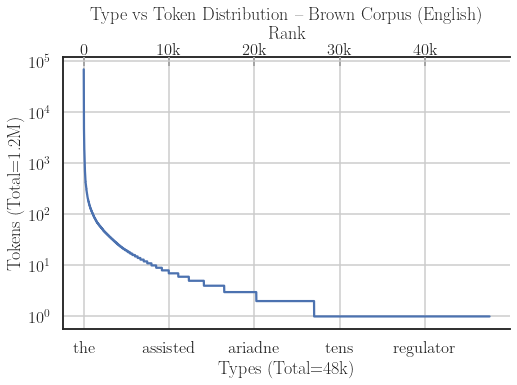

In [17]:
#font='Garamound'
font='Verdana'
#font='Georgia'
#font='Chalkboard'
#font='Menlo'
#figsize=8, 6
figsize = 8, 5
#font="Times"

sns.set(font=font, style='white',font_scale=2)
sns.set_context("talk")
args=dict(figsize=figsize, logy=True, legend=False, ylabel='Tokens (Total=1.2M)', xlabel=f'Types (Total=48k)', rot=0)
ax = df.plot(x='Type', y='Frequency', **args)
#ax.xaxis.grid(False)
ax.grid(True)
sns.despine()

print(df['Frequency'].sum(), len(df))
plt.title(f'Type vs Token Distribution -- Brown Corpus (English)')
secax = ax.secondary_xaxis('top')
secax.set_xlabel('Rank')
secax.xaxis.set_major_formatter(ticker.EngFormatter(sep=''))
secax.tick_params(axis='x', which='major', direction="in", pad=-0)


if True:
    save = 'charts/brown-corpus-zipf.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')

In [8]:
total = df['Frequency'].sum()
df['Probability'] = df['Frequency'] / total
# https://en.wikipedia.org/wiki/Information_content
df['InformationContent'] = -1 * np.log2(df['Probability']) 
df["Entropy"] = (df["Probability"] * df['InformationContent'])

df['CumProb'] = df['Probability'].cumsum() / df['Probability'].sum()
df['CumInfo'] = df['InformationContent'].cumsum() / df['InformationContent'].sum()

df["CumEntropy"] = df['Entropy'].cumsum() / df['Entropy'].sum()
df

,Type,Frequency,Probability,InformationContent,Entropy,CumProb,CumInfo,CumEntropy
0,the,69971,5.961138e-02,4.068268,0.242515,0.059611,0.000005,0.024156
1,",",58336,4.969901e-02,4.330639,0.215228,0.109310,0.000009,0.045594
2,.,50238,4.279997e-02,4.546247,0.194579,0.152110,0.000015,0.064975
3,of,36412,3.102099e-02,5.010612,0.155434,0.183131,0.000020,0.080457
4,and,28853,2.458114e-02,5.346304,0.131418,0.207712,0.000026,0.093547
...,...,...,...,...,...,...,...,...
47562,aviary,1,8.519441e-07,20.162738,0.000017,0.999997,0.999909,0.999993
47563,olive-flushed,1,8.519441e-07,20.162738,0.000017,0.999997,0.999932,0.999995
47564,coral-colored,1,8.519441e-07,20.162738,0.000017,0.999998,0.999954,0.999997
47565,boucle,1,8.519441e-07,20.162738,0.000017,0.999999,0.999977,0.999998


In [9]:
key_percent = 0.95
prob_pos = 0
info_pos = 0
ent_pos = 0
for i,c in enumerate(df['CumProb']):
    if c >= key_percent:
        prob_pos = i
        break
        
for i, c in enumerate(df['CumInfo']):
    if c >= key_percent:
        info_pos = i
        break

for i, c in enumerate(df['CumEntropy']):
    if c >= key_percent:
        ent_pos = i
        break
print(prob_pos, info_pos, ent_pos)

13325 45374 22443


saving to charts/brown-corpus-zipf-cum.pdf


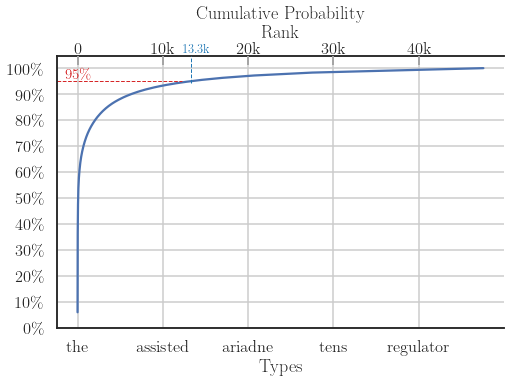

In [18]:
#sns.set(font="Verdana", style='white',font_scale=2.0)
args=dict(figsize=figsize, ylabel='', xlabel=f'Types', rot=0, title="Cumulative Probability", legend=False)
ax = df.plot(x=f'Type', y=['CumProb'], **args)
ax.yaxis.grid(which='major')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.axhline(y=key_percent, xmax=prob_pos/len(df), linestyle='--', color='tab:red', linewidth=1)
plt.text(-1500, key_percent+0.01, f'{round(key_percent*100)}\%',rotation=0, fontsize='small', color='tab:red')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))



secax = ax.secondary_xaxis('top')
secax.set_xlabel('Rank')
secax.xaxis.set_major_formatter(ticker.EngFormatter(sep=''))
secax.tick_params(axis='x', which='major', direction="in", pad=-0)
plt.axvline(x=prob_pos, ymin=0.9, ymax=1, linestyle='--', color='tab:blue', linewidth=1)
plt.text(prob_pos-1000, 1.06, f'{round(prob_pos/1000, 1)}k',rotation=0, fontsize='x-small', color='tab:blue')
ax.grid(True)
sns.despine()

if True:
    save = 'charts/brown-corpus-zipf-cum.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')

saving to charts/brown-corpus-shannons.pdf


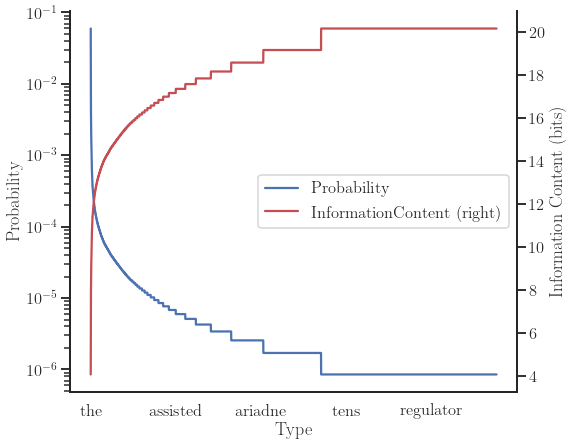

In [19]:
#sns.set(font=font, style='white',font_scale=2.0)
#sns.set_context('talk')
figsize=8,7
args = dict(figsize=figsize, logy=True, ylabel='Probability', rot=0, legend=False)
ax1 = df.plot(x='Type', y=['Probability'], **args)

#ax1.legend(loc='center right')
#ax.yaxis.grid(which='major')
ax2 = df['InformationContent'].plot(secondary_y=True, color='r', rot=0, legend=False)
ax2.set_ylabel('Information Content (bits)')

lines = ax1.get_lines() + ax2.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='center right')
sns.despine(right=False)

if True:
    save = 'charts/brown-corpus-shannons.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')

In [13]:
df[df.isnull().any(axis=1)]

,Type,Frequency,Probability,InformationContent,Entropy,CumProb,CumInfo,CumEntropy


In [14]:
df

,Type,Frequency,Probability,InformationContent,Entropy,CumProb,CumInfo,CumEntropy
0,the,69971,5.961138e-02,4.068268,0.242515,0.059611,0.000005,0.024156
1,",",58336,4.969901e-02,4.330639,0.215228,0.109310,0.000009,0.045594
2,.,50238,4.279997e-02,4.546247,0.194579,0.152110,0.000015,0.064975
3,of,36412,3.102099e-02,5.010612,0.155434,0.183131,0.000020,0.080457
4,and,28853,2.458114e-02,5.346304,0.131418,0.207712,0.000026,0.093547
...,...,...,...,...,...,...,...,...
47562,aviary,1,8.519441e-07,20.162738,0.000017,0.999997,0.999909,0.999993
47563,olive-flushed,1,8.519441e-07,20.162738,0.000017,0.999997,0.999932,0.999995
47564,coral-colored,1,8.519441e-07,20.162738,0.000017,0.999998,0.999954,0.999997
47565,boucle,1,8.519441e-07,20.162738,0.000017,0.999999,0.999977,0.999998


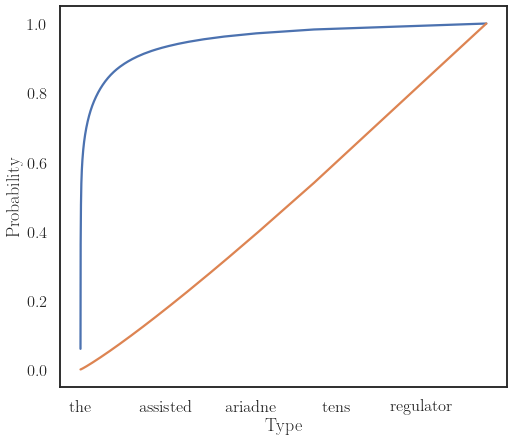

In [15]:
args=dict(figsize=figsize, ylabel='Probability', ylim=(-0.05, 1.05), legend=False)
ax1 = df.plot(x='Type', y=['CumProb', 'CumInfo'], **args)

saving to charts/brown-corpus-shannons-cum.pdf


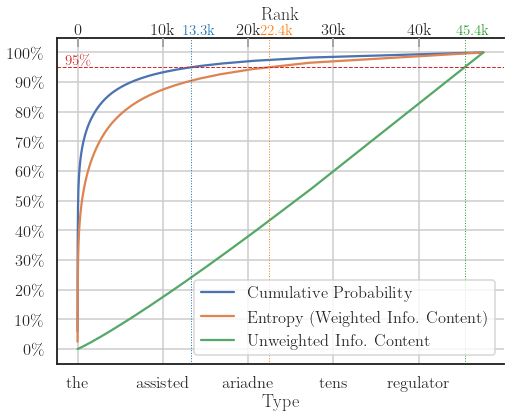

In [20]:
#sns.set(font=font, font_scale=1.6, style='white')
figsize=8,6
args = dict(figsize=tuple(x * 1 for x in figsize), ylabel='', ylim=(-0.05, 1.05), legend=False)
ax = df.plot(x='Type', y=['CumProb', 'CumEntropy', 'CumInfo'],
             label=['Cumulative Probability', 'Entropy (Weighted Info. Content)', 'Unweighted Info. Content'], **args)
lines = ax.get_lines()
plt.legend(lines, [line.get_label() for line in lines], loc='lower right')
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.axhline(y=key_percent, linestyle='--', color='tab:red', linewidth=1)
plt.text(-1500, key_percent+0.01, f'{round(key_percent*100)}\%',rotation=0, fontsize='small', color='tab:red')

plt.axvline(x=prob_pos,  linestyle=':', color='tab:blue', linewidth=1)
plt.text(prob_pos - 1000, 1.06, f'{prob_pos/1000:.1f}k',rotation=0, fontsize='small', color='tab:blue')
plt.axvline(x=ent_pos,  linestyle=':', color='tab:orange', linewidth=1)
plt.text(ent_pos - 1000, 1.06,f'{ent_pos/1000:.1f}k',rotation=0, fontsize='small', color='tab:orange')
plt.axvline(x=info_pos,  linestyle=':', color='tab:green', linewidth=1)
plt.text(info_pos - 1000, 1.06,f'{info_pos/1000:.1f}k',rotation=0, fontsize='small', color='tab:green')

plt.grid(True)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

secax = ax.secondary_xaxis('top')
secax.set_xlabel('Rank')
secax.xaxis.set_major_formatter(ticker.EngFormatter(sep=''))
secax.tick_params(axis='x', which='major', direction="in", pad=-0)

sns.despine()
if True:
    save = 'charts/brown-corpus-shannons-cum.pdf'
    print(f'saving to {save}')
    plt.savefig(save, bbox_inches='tight')

# Harmonic Numbers 

Harmonic numbers are used for estimating variance of zipf
 

https://en.wikipedia.org/wiki/Harmonic_number


In [22]:
import numpy as np

def harmonic(n, s=1):
    """
    :param n: total harmonic number
    :param s: power coefficient
    """
    res = np.zeros(n+1, dtype=np.float64)
    for x in range(1, n+1):
        res[x] = 1/(x ** s)
    return res

print(harmonic(20))

[0.         1.         0.5        0.33333333 0.25       0.2
 0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
 0.08333333 0.07692308 0.07142857 0.06666667 0.0625     0.05882353
 0.05555556 0.05263158 0.05      ]


---- 

In [1]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(font, path):
    return f"<p><code>{font}</code>:<span style='font-family:{font};font-size: 14px;'>{font} {font.upper()} <br/> 0123456789 .,?/\";:\\|!@#$%^&*()_+= </span><br/> {path}</p>"

code = "\n".join([make_html(font, p) for (font, p) in sorted(set([(f.name, f.fname) for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 3;'>{}</div>".format(code))